<a href="https://colab.research.google.com/github/waltermayor/rescityUAO/blob/master/maskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
!ls
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/

drive  sample_data
Cloning into 'darknet'...
remote: Enumerating objects: 14291, done.
remote: Total 14291 (delta 0), reused 0 (delta 0), pack-reused 14291
Receiving objects: 100% (14291/14291), 12.85 MiB | 25.16 MiB/s, done.
Resolving deltas: 100% (9752/9752), done.


In [4]:
cp drive/'My Drive'/rescity/data_for_colab_mask.zip /content/darknet/

In [6]:
cd darknet

/content/darknet


In [7]:
!unzip data_for_colab_mask

Archive:  data_for_colab_mask.zip
   creating: data_for_colab_mask/
  inflating: data_for_colab_mask/obj.names  
  inflating: data_for_colab_mask/yolov3-tiny-obj.cfg  
  inflating: data_for_colab_mask/test.txt  
  inflating: data_for_colab_mask/train.txt  
   creating: data_for_colab_mask/data/
  inflating: data_for_colab_mask/data/mk10.png  
  inflating: data_for_colab_mask/data/mk102.png  
  inflating: data_for_colab_mask/data/mk108.png  
  inflating: data_for_colab_mask/data/mk11.png  
  inflating: data_for_colab_mask/data/mk115.png  
  inflating: data_for_colab_mask/data/mk116.png  
  inflating: data_for_colab_mask/data/mk118.png  
  inflating: data_for_colab_mask/data/mk119.png  
  inflating: data_for_colab_mask/data/mk12.png  
  inflating: data_for_colab_mask/data/mk121.png  
  inflating: data_for_colab_mask/data/mk122.png  
  inflating: data_for_colab_mask/data/mk123.png  
  inflating: data_for_colab_mask/data/mk128.png  
  inflating: data_for_colab_mask/data/mk134.png  
  infla

In [8]:
#upload train test.txt files
from google.colab import files
uploaded = files.upload() 
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

Saving test.txt to test.txt
saved file test.txt


In [9]:
!apt-get update
!apt-get upgrade

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [96.1 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 k

In [10]:
!apt-get install build-essential
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.7).
libavcodec-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libavcodec-dev set to manually installed.
libavformat-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libavformat-dev set to manually installed.
libswscale-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libswscale-dev set to manually installed.
The following additional packages will be installed:
  autoconf automake autopoint autotools-dev debhelper dh-autoreconf
  dh-strip-nondeterminism file gettext gettext-base gi

In [11]:
!apt-get install libavcodec-dev libavformat-dev libswscale-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libavcodec-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libavformat-dev is already the newest version (7:3.4.8-0ubuntu0.2).
libswscale-dev is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [12]:
!apt-get -y install cmake
!which cmake

!cmake --version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
/usr/local/bin/cmake
cmake version 3.12.0

CMake suite maintained and supported by Kitware (kitware.com/cmake).


In [13]:
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [14]:
!apt-get install vim

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgpm2 vim-common vim-runtime xxd
Suggested packages:
  gpm ctags vim-doc vim-scripts
The following NEW packages will be installed:
  libgpm2 vim vim-common vim-runtime xxd
0 upgraded, 5 newly installed, 0 to remove and 4 not upgraded.
Need to get 6,724 kB of archives.
After this operation, 32.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 xxd amd64 2:8.0.1453-1ubuntu1.3 [49.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim-common all 2:8.0.1453-1ubuntu1.3 [70.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgpm2 amd64 1.20.7-5 [15.1 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim-runtime all 2:8.0.1453-1ubuntu1.3 [5,436 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim amd64 2:8.0.1453-

In [15]:
ls

3rdparty/               darknet_video.py         net_cam_v3.sh*
build/                  data/                    net_cam_v4.sh*
build.ps1*              data_for_colab_mask/     README.md
build.sh*               data_for_colab_mask.zip  results/
cfg/                    image_yolov3.sh*         scripts/
cmake/                  image_yolov4.sh*         src/
CMakeLists.txt          include/                 test.txt
DarknetConfig.cmake.in  json_mjpeg_streams.sh*   video_yolov3.sh*
darknet_images.py       LICENSE                  video_yolov4.sh*
darknet.py              Makefile


In [16]:
#Now let's get some YOLOv3 weights from the official site
!ls
!wget https://pjreddie.com/media/files/yolov3.weights


3rdparty		darknet_video.py	 net_cam_v3.sh
build			data			 net_cam_v4.sh
build.ps1		data_for_colab_mask	 README.md
build.sh		data_for_colab_mask.zip  results
cfg			image_yolov3.sh		 scripts
cmake			image_yolov4.sh		 src
CMakeLists.txt		include			 test.txt
DarknetConfig.cmake.in	json_mjpeg_streams.sh	 video_yolov3.sh
darknet_images.py	LICENSE			 video_yolov4.sh
darknet.py		Makefile
--2020-09-14 22:34:41--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   668KB/s    in 5m 13s  

2020-09-14 22:39:54 (775 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [17]:
#No here we're modifying the makefile to set OPENCV and GPU to 1
!ls
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile

3rdparty		darknet_video.py	 net_cam_v3.sh
build			data			 net_cam_v4.sh
build.ps1		data_for_colab_mask	 README.md
build.sh		data_for_colab_mask.zip  results
cfg			image_yolov3.sh		 scripts
cmake			image_yolov4.sh		 src
CMakeLists.txt		include			 test.txt
DarknetConfig.cmake.in	json_mjpeg_streams.sh	 video_yolov3.sh
darknet_images.py	LICENSE			 video_yolov4.sh
darknet.py		Makefile		 yolov3.weights


In [18]:
!ls
%cd ../
!ls

3rdparty		darknet_video.py	 net_cam_v3.sh
build			data			 net_cam_v4.sh
build.ps1		data_for_colab_mask	 README.md
build.sh		data_for_colab_mask.zip  results
cfg			image_yolov3.sh		 scripts
cmake			image_yolov4.sh		 src
CMakeLists.txt		include			 test.txt
DarknetConfig.cmake.in	json_mjpeg_streams.sh	 video_yolov3.sh
darknet_images.py	LICENSE			 video_yolov4.sh
darknet.py		Makefile		 yolov3.weights
/content
darknet  drive	sample_data


In [19]:
!apt install g++-5
!apt install gcc-5

!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 10
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 10
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 20
!update-alternatives --install /usr/bin/cc cc /usr/bin/gcc 30
!update-alternatives --set cc /usr/bin/gcc
!update-alternatives --install /usr/bin/c++ c++ /usr/bin/g++ 30
!update-alternatives --set c++ /usr/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cpp-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 4 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base amd64 5.5.0-12ubuntu1 [17.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libisl15 amd64 0.18-4 [548 kB]
Get:3 http

In [20]:
#Now, here's a bunch of code that takes the longest to execute here but
#It's about installing CUDA and using the beautiful Tesla K80 GPU, so that
#Will worth it

!apt update -qq;
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt-get update -qq

#Here were are installing compilers and creating some links
!apt-get install cuda -y -qq #gcc-5 g++-5 
#!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
#!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++
!apt update
!apt upgrade
!apt install cuda-8.0 -y

4 packages can be upgraded. Run 'apt list --upgradable' to see them.
--2020-09-14 22:42:09--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.0.24
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.0.24|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?7vwqUjfGZ62QPnSGEcBZ1LsZkT9rGi2D-MsY9AgDQ10N6x4DDR6_aO3twL72Qn-NDRwbEZ-18ITYWj4Fu-jCLrepdDuEq8BXwafTfCi7HlsijuU4Job4VmE4UBuK0DA50T9AN7G_x_IBQBrAO3gMx4VlU20NqcNQqmKBEoF_nJCjObVtTK5lkm8WzhMRMQDWPS9zwealcPsvb1IsPbEb1I29oA [following]
--2020-09-14 22:42:09--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?7vwqUjfGZ62QPnSGEcBZ1LsZkT9rG

In [21]:
#Now let's see whether the GPU is here and CUDA was successfully installed!
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

print("'sup!'")

!/usr/local/cuda/bin/nvcc --version


'sup!'
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


In [22]:
ls

cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb  drive/
darknet/                                               sample_data/


In [23]:
%cd darknet
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1424:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^
./src/image_opencv.cpp:1400:9: warning: unused variable ‘it_tb_res’ [-Wunused-variable]
     int it_tb

In [24]:
!ls
#Now, let's see if everything works by running it on a test image
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

3rdparty	DarknetConfig.cmake.in	 include		scripts
backup		darknet_images.py	 json_mjpeg_streams.sh	src
build		darknet.py		 LICENSE		test.txt
build.ps1	darknet_video.py	 Makefile		video_yolov3.sh
build.sh	data			 net_cam_v3.sh		video_yolov4.sh
cfg		data_for_colab_mask	 net_cam_v4.sh		yolov3.weights
cmake		data_for_colab_mask.zip  obj
CMakeLists.txt	image_yolov3.sh		 README.md
darknet		image_yolov4.sh		 results
 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64

In [25]:
#Let's define some functions that will let us show images, and upload and 
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

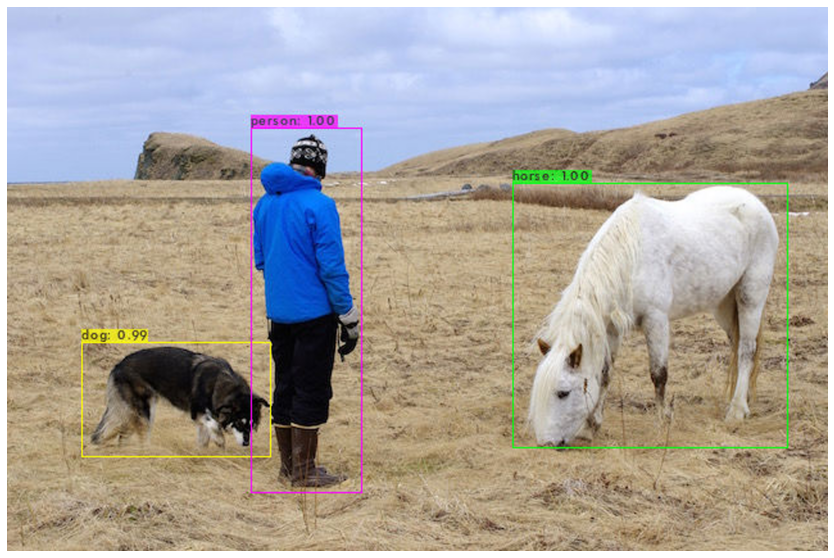

In [26]:
imShow('predictions.jpg')

In [27]:
ls

3rdparty/               darknet_video.py         obj/
backup/                 data/                    predictions.jpg
build/                  data_for_colab_mask/     README.md
build.ps1*              data_for_colab_mask.zip  results/
build.sh*               image_yolov3.sh*         scripts/
cfg/                    image_yolov4.sh*         src/
cmake/                  include/                 test.txt
CMakeLists.txt          json_mjpeg_streams.sh*   video_yolov3.sh*
darknet*                LICENSE                  video_yolov4.sh*
DarknetConfig.cmake.in  Makefile                 yolov3.weights
darknet_images.py       net_cam_v3.sh*
darknet.py              net_cam_v4.sh*


In [28]:
!cd darknet
!ls




/bin/bash: line 0: cd: darknet: Not a directory
3rdparty	DarknetConfig.cmake.in	 include		results
backup		darknet_images.py	 json_mjpeg_streams.sh	scripts
build		darknet.py		 LICENSE		src
build.ps1	darknet_video.py	 Makefile		test.txt
build.sh	data			 net_cam_v3.sh		video_yolov3.sh
cfg		data_for_colab_mask	 net_cam_v4.sh		video_yolov4.sh
cmake		data_for_colab_mask.zip  obj			yolov3.weights
CMakeLists.txt	image_yolov3.sh		 predictions.jpg
darknet		image_yolov4.sh		 README.md


In [29]:
!./darknet detector train data_for_colab_mask/obj.data data_for_colab_mask/yolov3-tiny-obj.cfg data_for_colab_mask/yolov3-tiny.conv.15 -dont_show

 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
Couldn't open file: data_for_colab/obj.data


In [ ]:
ls

3rdparty/               darknet.py              net_cam_v3.sh*
appveyor.yml            darknet_video.py        obj/
backup/                 data/                   predictions.jpg
build/                  data_for_colab/         README.md
build.ps1*              data_for_colab.zip      results/
build.sh*               image_yolov2.sh*        scripts/
cfg/                    image_yolov3.sh*        src/
cmake/                  include/                test.txt
CMakeLists.txt          json_mjpeg_streams.sh*  video_v2.sh*
darknet*                LICENSE                 video_yolov3.sh*
DarknetConfig.cmake.in  Makefile                yolov3.weights


In [ ]:
cp /content/drive/'My Drive'/capillar/yolov3-tiny-obj_10000.weights /content/darknet/backup/

In [ ]:
from google.colab import files
uploaded = files.upload() 
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

Saving test5.jpg to test5.jpg
saved file test5.jpg


In [ ]:
!./darknet detector test data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_10000.weights test5.jpg -i 0 -thresh 0.7 -dont_show -out /content/drive/'My Drive'/capillar/entrenado.txt

 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 610, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max             

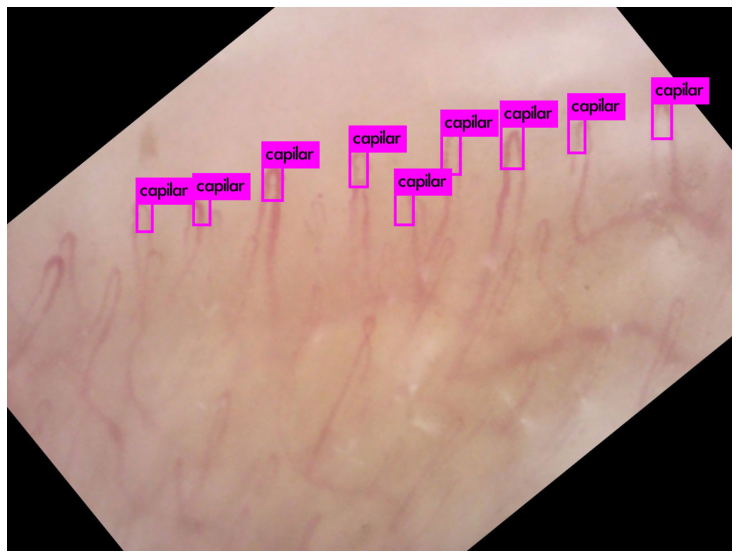

In [ ]:
imShow('predictions.jpg')


In [ ]:
cd ..

/content


In [ ]:
cp drive/'My Drive'/helmet/bike1.mp4 /content/darknet

cp: cannot stat 'drive/My Drive/helmet/bike1.mp4': No such file or directory


In [ ]:
cd darknet

/content/darknet


In [ ]:
ls

 3rdparty/                darknet_video.py         predictions.jpg
 appveyor.yml             data/                    README.md
 backup/                  data_for_colab/          results/
 build/                   data_for_colab.zip       scripts/
 build.ps1*               image_yolov2.sh*         src/
 build.sh*                image_yolov3.sh*        'test (1).txt'
 cfg/                     include/                 test.txt
 cmake/                   json_mjpeg_streams.sh*   video_v2.sh*
 CMakeLists.txt           LICENSE                  video_yolov3.sh*
 darknet*                 Makefile                 yolov3.weights
 DarknetConfig.cmake.in   net_cam_v3.sh*           yolov3.weights.1
 darknet.py               obj/


In [ ]:
!./darknet detector demo data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_1000.weights  -dont_show bike1.mp4 -i 0 -out_filename veout.avi

 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
Couldn't open file: /D:/Lenovo/Documentos/Yolo-Training-GoogleColab-master/data_for_colab/obj.names


In [ ]:
download('veout.avi') 

FileNotFoundError: ignored

In [ ]:
!./darknet detector calc_anchors Dataset/obj.data -num_of_clusters 5 -width 416 -height 416

 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0

 num_of_clusters = 5, width = 416, height = 416 
Couldn't open file: Dataset/obj.data
